# 결정트리

### 로지스틱 회귀로 와인 분류
- 알코올 도수, 당도, pH, class(레드와인: 0, 화이트와인: 1)

In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


#### 정보확인

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#### 샘플 나누기

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [15]:
train_data.shape, test_data.shape

((5197, 3), (1300, 3))

#### 표준화 작업

In [16]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(train_data)
train_scaled = st.transform(train_data)
test_scaled = st.transform(test_data)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [20]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### 중간 결론
- 훈련 세트와 테스트 세트의 점수가 모두 낮기 때문에 모델이 다소 과소적합(underfitting)
- __결정 트리__ 라는 방식을 사용해보자

### 결정 트리 Decision Tree
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 --> 앙상블
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 직관적이고 이해하기 쉬운 모델

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

DecisionTreeClassifier()

In [22]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8623076923076923


### 중간 결론
- 결정트리(decision tree)를 사용한게 로지스틱 회귀 방식보다 잘 듣는다.
- 모델은 다소 과대적합(overfitting)
- 이제, 이해를 돕기 위해 plot_tree()함수를 이용해 그림을 그려보자.

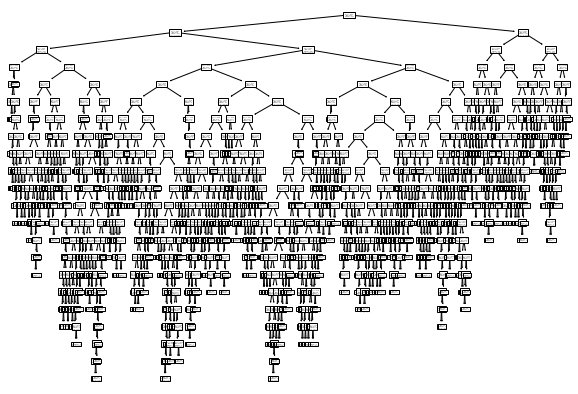

In [23]:
# plot_tree()
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### 트리 그래프
- 노드(node) : 결정 트리를 구성하는 핵심 요소, 훈련 데이터의 특성에 대한 테스트를 표현
    - 루트 노드(root node): 맨 위의 노드 
    - 리프 노드(leaf node): 맨 아래의 노드
- 가지(branch) : 테스트의 결과(True, False)를 나타내며, 일반적으로 하나의 노드는 2개의 가지를 가집니다.

- 보통 plot_tree 로 구현하고, 트리의 깊이를 파라미터로 제한할 수 있다.
    - plot_tree의 파라미터: 
        - max_depth : 루프 노드를 제외한 깊이
        - filled : 클래스에 맞게 노드의 색을 칠할 수 있음(boolean)
        - feature_names : 특성의 이름 전달
        - class_names : 클래스의 이름 전달

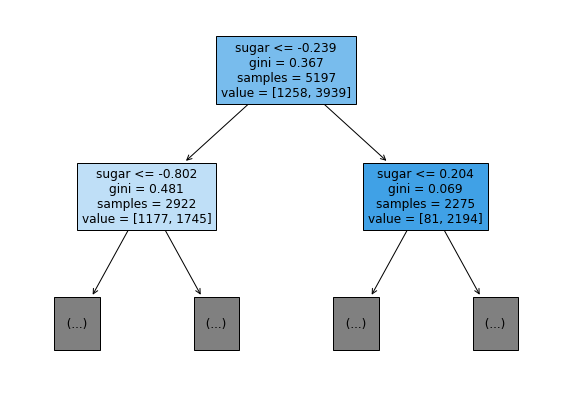

In [29]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### 트리 그래프 읽는 법
0. 왼쪽이 Yes, 오른쪽이 No
1. 최상단 : 테스트 조건 
2. 불순도(gini)
- 지니 불순도 : 1 - (음성클래스비율^2 + 양성클래스비율^2) 
    - 양성,음성 각각 0.5이면, 지니 불순도는 0.5가 되어서 최악
    - 양성은 1, 음성은 0이면, 지니 불순도는 0이 되어서 최상(__순수노드__ 라고 부름)
    - 0에서 0.5 사이의 값
3. 총 샘플 수(samples)
4. 클래스별 샘플 수(value) = [0인클래스 샘플 수(레드와인), 1인클래스 샘플 수(화이트와인)]
5. filled= True : 1인 클래스 샘플 수(화이트 와인) 비율이 증가할 수록 색깔이 진해진다.
6. 결정 트리에서 예측 : __리프 노드에서 가장 많은 클래스__ 가 예측 클래스가 됨
- 즉, 왼쪽노드의 샘플과 오른쪽노드의 샘플은 모두 양성 클래스(화이트와인)으로 예측

7. 결정 트리 모델의 계산 과정: 
- 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장
- 부모의 불순도 - ( 왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽노드불순도 - (오른쪽 노드 샘플 수 /부모의 샘플 수) * 오른쪽노드불순도 = 0.066 : __이 차이가 가장 크도록__
- 이러한 부모와 자식 노드의 불순도 차이: 정보 이득(information gain)


### 가지치기

In [30]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


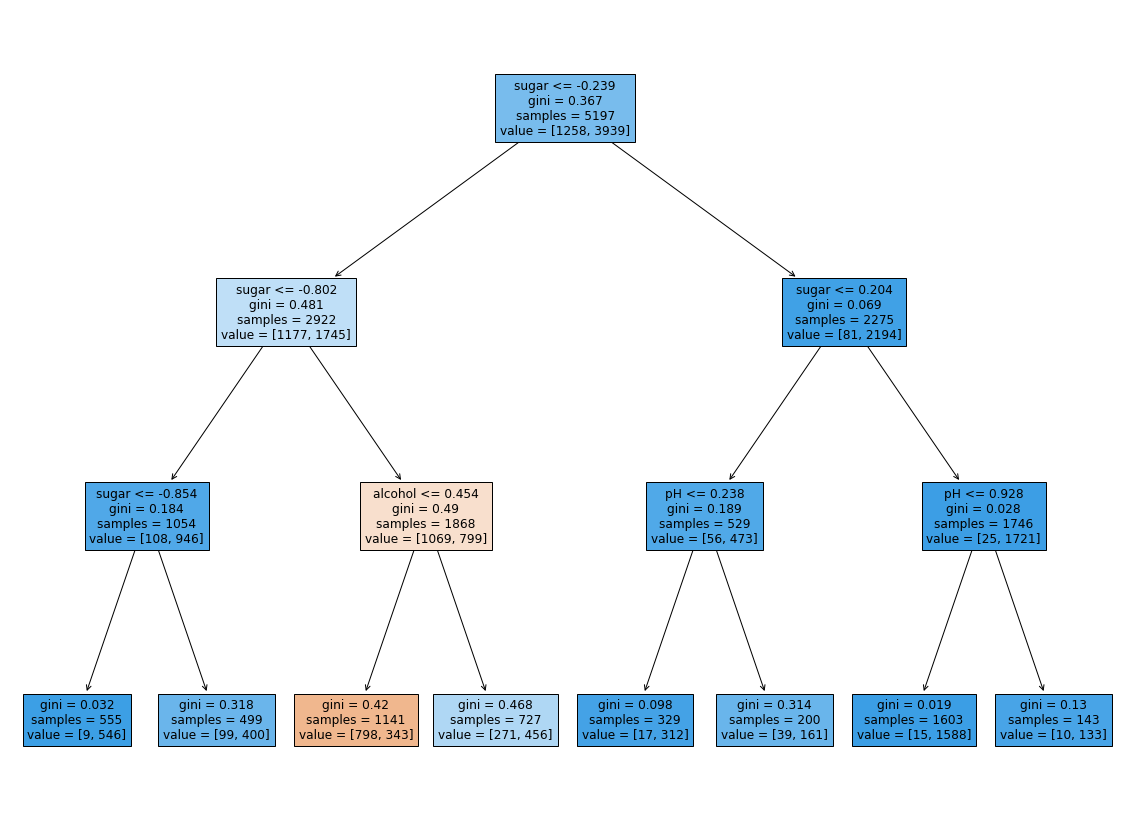

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### 결정 트리의 특징
- 표준화(standardization)가 필요없다
- __특성 중요도__ (feature importance) : 어떤 특성이 가장 유용한지 나타냄
- 엔트로피 불순도를 사용할 수도 있다.

In [33]:
print(dt.feature_importances_)   # sugar가 0.8686으로 가장 중요한 특성임을 알려줌

[0.12345626 0.86862934 0.0079144 ]


#### 결정 트리의 파라미터 
- min_impurity_decrease : 어떤 노드의 정보이득 *(노드의 샘플수)/(전체샘플수) 값이 이 매개변수보다 작으면 분할을 멈춤
- min_sample_split : 한 노드의 최소 데이터 수, 최소 데이터 수 아래로 분할하지 않음
- max_depth : 최대 깊이 조정 (int, default = None)
- min_samples_split : 자식 노드 분할 위한 최소 샘플 수 (int, default = 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (int, default = 1)
- splitter : 각 노드 분할 선택 방법 설정 (default = 'best', 'random'택할 수도)

0.8874350586877044
0.8615384615384616


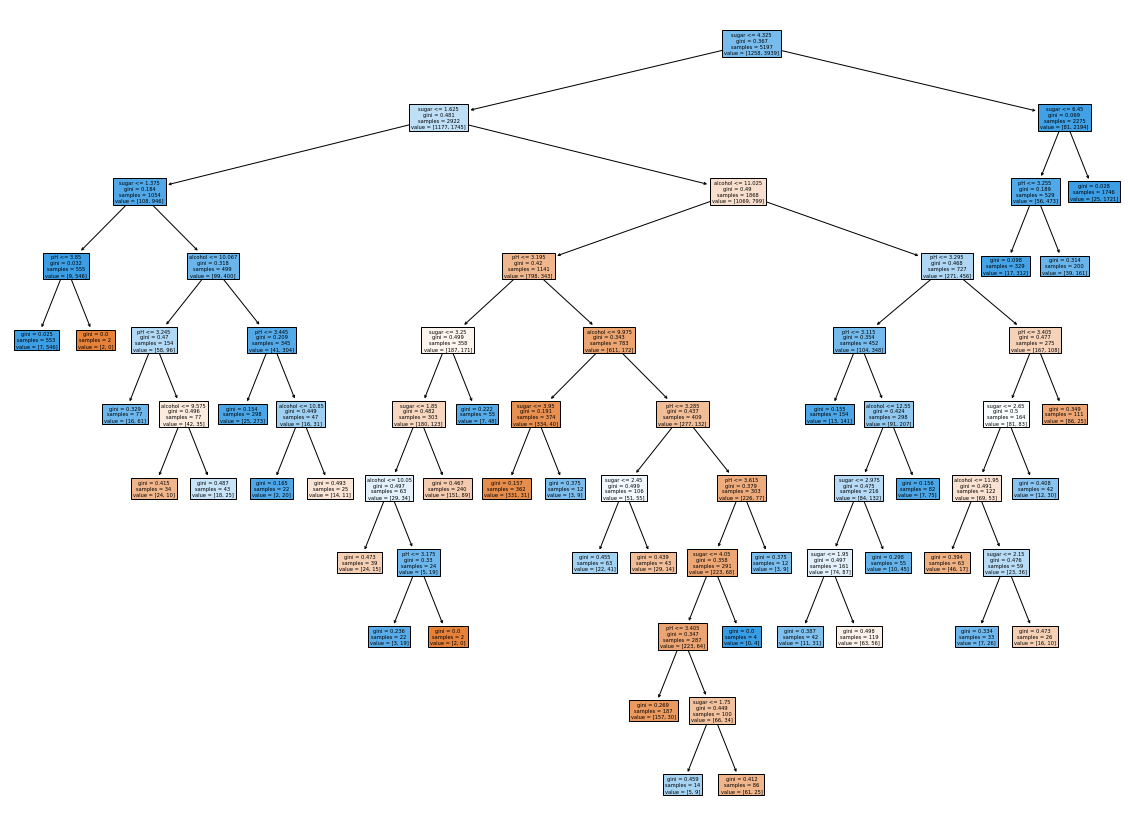

In [34]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_data, train_target)
print(dt.score(train_data, train_target))
print(dt.score(test_data, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()